# Exercise 1 Business and Data Understanding

## Business Understanding
To reduce the number of unexpected failures and optimize maintenance intervals, large aircraft maintenance companies aim to change their maintenance models from scheduled maintenance to predictive maintenance. One important aspect of this is the assessment of the current health status of the aircraft components and the prediction of their remaining lifetime based on measured sensor data. In this exercise, we focus on the prediction of aircraft engines.

The provided data contains run-to-failure simulations for different engines generated by the C-MAPSS (Commercial Modular Aero-Propulsion System Simulation) tool which is used for the simulation of a large commercial aircraft engine. Detailed information on the generation of the data can be found in the paper "Damage Propagation Modeling for Aircraft Engine Run-To-Failure Simulation" by Saxena, Goebel, Simon and Eklund that we provide you in Moodle.

The goal is to estimate the remaining useful lifetime (RUL) of the aircraft engines. The total exercise will be divided into three sub-tasks following the CRISP-DM model. In this week, the focus will be on the understanding of the available dataset.

## Data Understanding
In Moodle, you can download the file “train_FD001.txt” that contains run-to-failure curves from several engines. The dataset contains in total 26 parameters that are shown in the table below.
For each data entry, the corresponding engine number and cycle number is given. All engines were simulated until failure, meaning that the cycle numbers reach from 1 to the end of life of the engines. Parameters 2 - 4 indicate the operating conditions that were input parameters for the simulation. The remaining parameters 5 - 25 are the simulated sensor data and therefore the output of the simulation.



| Parameter | Name       | Description                      | Units    |
|-----------|------------|----------------------------------|----------|
| 0     	   | Engine     | 	Engine number                   | 	-       |
| 1	        | Cycle	     | Cycle number                     | 	-       |
| 2	        | Altitude   | 	Altitude                        | 	1000 ft |
| 3	        | MachNumber | 	Mach Number                     | 	-       |
| 4	        | TRA        | 	Thrust Resolver Angle           | 	-       |
| 5	        | T2         | 	Total temperature at fan inlet  | 	°R      |
| 6	        | T24        | 	Total temperature at LPC outlet | 	°R      |
| 7	        | T30        | 	Total temperature at HPC outlet | 	°R      |
| 8	        | T50        | 	Total temperature at LPT outlet | 	°R      |
| 9	        | P2         | 	Pressure at fan inlet           | 	psia    |
| 10	       | P15        | 	Total pressure in bypass-duct   | 	psia    |
| 11	       | P30        | 	Total pressure at HPC outlet    | 	psia    |
| 12	       | Nf         | 	Physical fan speed              | 	rpm     |
| 13	       | Nc         | 	Physical core speed             | 	rpm     |
| 14	       | epr        | 	Engine pressure ratio           | 	-       |
| 15	       | Ps30       | 	Static pressure at HPC outlet   | 	psia    |
| 16	       | phi        | 	Ratio of fuel flow to Ps30      | 	pps/psi |
| 17	       | NRf        | 	Corrected fan speed             | 	rpm     |
| 18	       | NRc        | 	Corrected core speed            | 	rpm     |
| 19	       | BPR        | 	Bypass ratio                    | 	-       |
| 20	       | farB       | 	Burner fuel-air ratio           | 	-       |
| 21	       | htBleed    | 	Bleed enthalpy                  | 	-       |
| 22	       | Nf_dmd     | 	Demanded fan speed              | 	rpm     |
| 23	       | PCNfR_dmd  | 	Demanded corrected fan speed    | 	rpm     |
| 24	       | W31        | 	HPT coolant bleed               | 	lbm/s   |
| 25	       | W32        | 	LPT coolant bleed               | 	lpm/s   |



For the simulation, the operating conditions were held constant at the following values:
- altitude = 0
- Mach number = 0
- Thrust Resolver Angle = 100




Please follow the following tasks to explore the given data:


### 1. Load the data into your program, e.g. into a pandas dataframe. As the txt-file does not contain a header, rename the columns with the parameter names from the table above.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# load data
train_path = "train_FD001.txt"

df = pd.read_csv(train_path, sep=" ", header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [3]:
# drop the last two columns (no values)
df = df.drop(columns=[26,27])


# rename the columns with the parameter names
data_header = {0: 'Engine', 1: 'Cycle', 2: 'Altitude', 3: 'MachNumber', 4: 'TRA', 5: 'T2', 6: 'T24', 7: 'T30', 8: 'T50', 9: 'P2', 10: 'P15', 11: 'P30', 12: 'Nf', 13: 'Nc', 14: 'epr', 15: 'Ps30', 16: 'phi', 17: 'NRf',
               18: 'NRc', 19: 'BPR', 20: 'farB', 21: 'htBleed', 22: 'Nf_dmd', 23: 'PCNfR_dmd', 24: 'W31', 25: 'W32'}

df = df.rename(columns=data_header)

df.head()

,Engine,Cycle,Altitude,MachNumber,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### 2. Look at the basic statistical properties of the data, for example using pandas "describe" function. What do you notice?

In [4]:
df.describe()

,Engine,Cycle,Altitude,MachNumber,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


Several sensor parameters have a standard deviation of 0:
- T2
- P2
- epr
- farB
- Nf_dmd
- PCNfR_dmd

--> These values are probably not useful for forecasting

Moreover, the operating condition "TRA" also has a standard deviation of 0 and always has the value 100.

There are in total 100 simulated engines.

### 3. Take a closer look at the operating conditions and plot their distributions. Is the assumption of constant operating conditions fulfilled?

<AxesSubplot: >

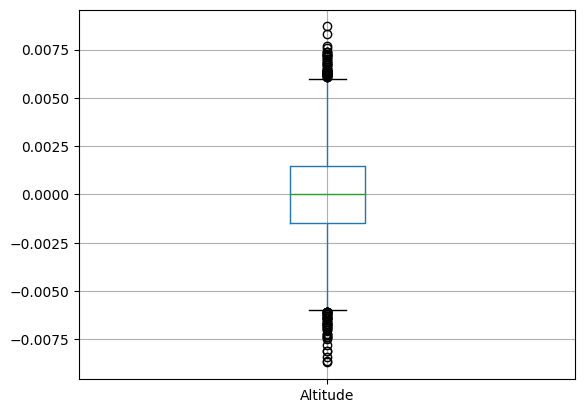

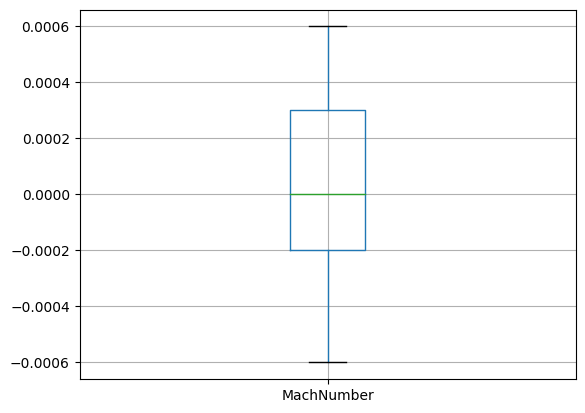

In [5]:
plt.figure()
df[['Altitude']].boxplot()
plt.figure()
df[['MachNumber']].boxplot()


The thrust is always at 100 which can be seen in the analysis from Task 1.
Altitude and MachNumber vary slightly. Their middle value lies at the intended value with the values being symmetrically distributed around the median. In both cases, the variations are very little. The maximum altitude lies at ca. 7.5 feet, the maximum Mach number at 0.0006. In conclusion, both can be seen as nearly constant.

### 4. Now inspect the sensor data and plot their distributions. What can you conclude regarding their utility for predicting the remaining useful lifetime? Hint: the remaining useful lifetime is defined as the number of cycles until the end of life.

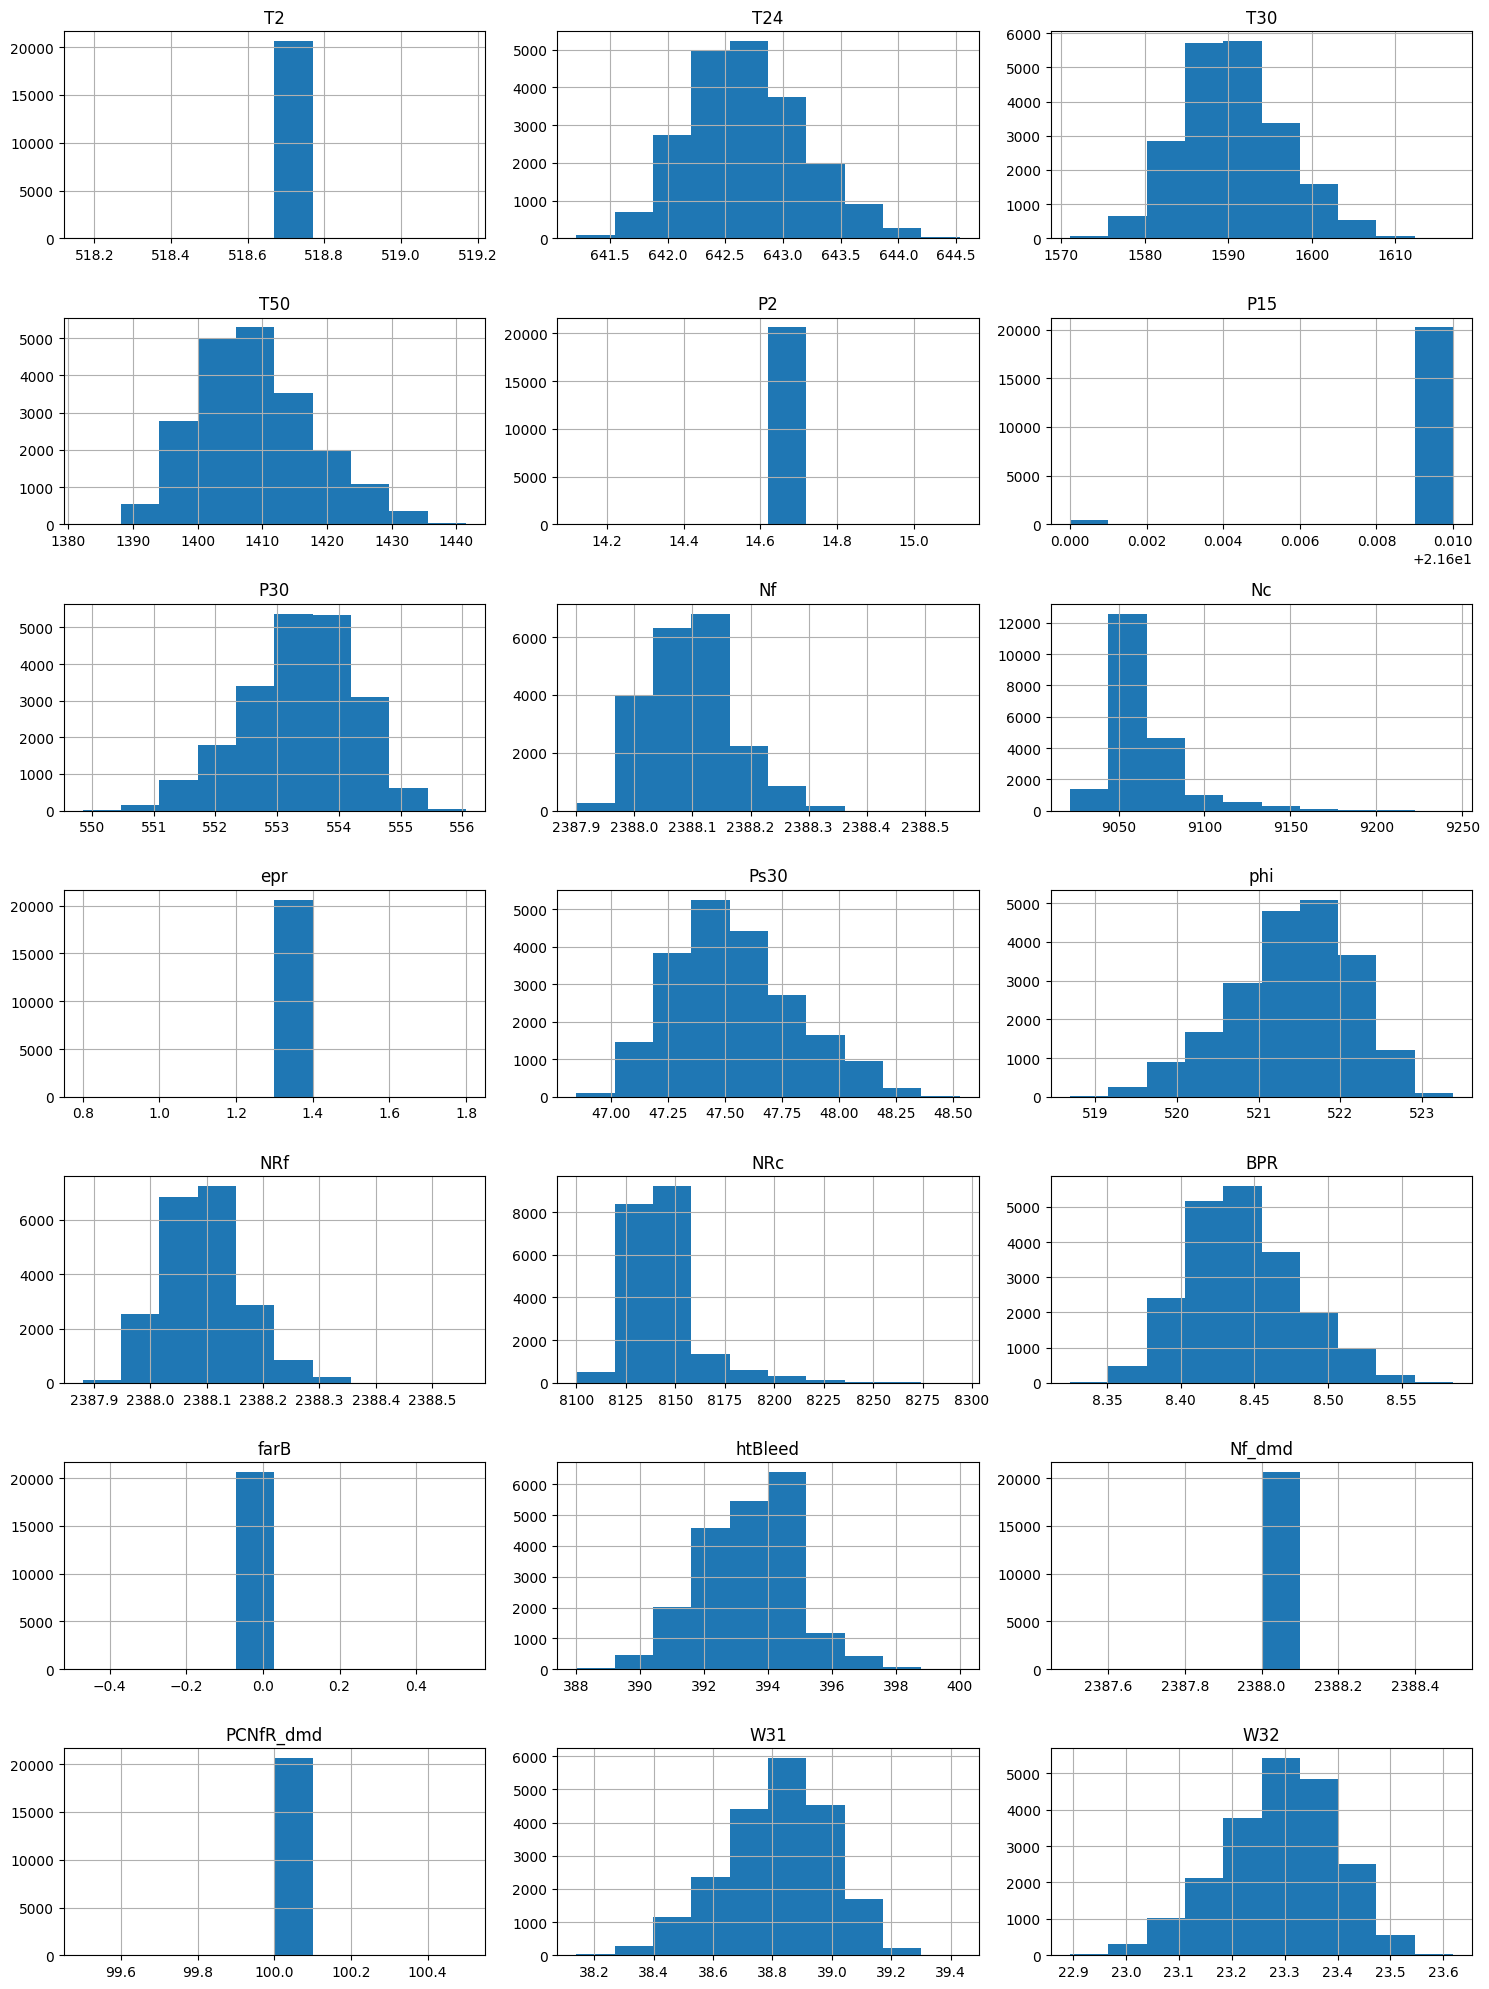

In [6]:
# plot a histogram for each sensor

fig = plt.figure(figsize=[15,20])
sensor_number = 1
for param in df.columns[5:26]:
    sbp = plt.subplot(7,3,sensor_number)
    df[param].hist()
    sbp.set_title(param)
    plt.tight_layout()
    sensor_number+=1

As already seen in Question 2, the variables T2, P2, epr, farB, Nf_dmd and PCNfR_dmd are constant and therefore not useful for RUL prediction.

P15 also seems to be nearly constant, with only a few exceptions.

All the other sensors seem to be normally distributed with some of them being skewed to the left, some to the right.

### 5. Perform a correlation analysis for the different sensors.

In [7]:
# selecting only the sensor data
sensor_data = df.iloc[:,5:26] # df.iloc[rows,columns]

# only evaluate correlations on sensor data that is not constant
sensor_data = sensor_data.drop(['T2', 'P2', 'P15', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'], axis=1)
correlation = sensor_data.corr(method='pearson')
correlation

,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
T24,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050
T30,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901
T50,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193
P30,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447
Nf,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840
Nc,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795
Ps30,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554
phi,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263
NRf,0.661792,0.600963,0.745158,-0.764611,0.826084,-0.034763,0.780761,-0.788441,1.000000,-0.147036,0.697662,0.627410,-0.686172,-0.688948
NRc,0.179752,0.237137,0.190748,-0.110053,-0.144787,0.963157,0.163408,-0.098141,-0.147036,1.000000,0.193761,0.246621,-0.187364,-0.192415


Next step: Plot the correlation matrix as a heatmap to visualize high and low values of the pearson correlation coefficient.

<AxesSubplot: >

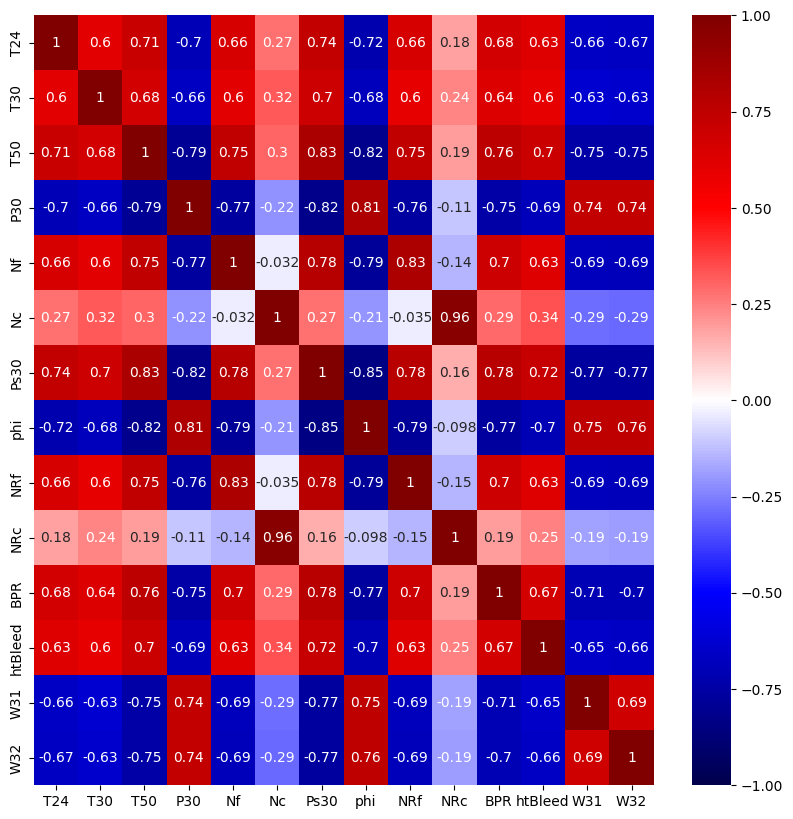

In [8]:
import seaborn as sb

fig = plt.figure(figsize=[10,10])
sb.heatmap(correlation, vmin=-1, vmax=1, center=0, cmap='seismic', annot=True)



Highest positive correlations are found between:
- Nc and NRc: 0.96
- Nf and NRf: 0.83
- T50 and Ps30: 0.83
- P30 and phi: 0.81

Highest negative correlations are found between:
- Ps30 and phi: -0.85
- P30 and Ps30: -0.82
- T50 and phi: -0.82



### 6. For every engine, calculate the maximum number of cycles and display the distribution of the maximum number of cycles.

In [2]:
# calculate maximum cycles per engine

df_max_cycles = df[['Engine', 'Cycle']].groupby(['Engine']).max()

df_max_cycles = df_max_cycles.rename(columns={'Cycle': 'Max_Cycles'})

# plot histogram
df_max_cycles.hist(column=['Max_Cycles'])

fig = plt.figure()
df_max_cycles.boxplot(column=['Max_Cycles'])
 

NameError: name 'df' is not defined

The RUL varies a lot from engine to engine with most values being at around 200 cycles. However, the lifetime of one engine even surpassed 350 cycles.


### 7. Calculate the target value for predicting the remaining useful lifetime (“RUL”) and estimate the correlations between the sensors and the target.


In [10]:
# merge the max_cycles value to the dataframe
df_rul = df.merge(df_max_cycles, left_on='Engine', right_index=True)

# calculation of remaining useful life

df_rul['RUL'] = df_rul['Max_Cycles'] - df_rul['Cycle']


df_rul.head()


,Engine,Cycle,Altitude,MachNumber,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Max_Cycles,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187


In [11]:
# Calculate the correlation
target_correlation = df_rul.corr(method='pearson') # you could also use spearman
target_correlation = target_correlation.loc['RUL']
target_correlation

Engine        0.078753
Cycle        -0.736241
Altitude     -0.003198
MachNumber   -0.001948
TRA                NaN
T2                 NaN
T24          -0.606484
T30          -0.584520
T50          -0.678948
P2                 NaN
P15          -0.128348
P30           0.657223
Nf           -0.563968
Nc           -0.390102
epr                NaN
Ps30         -0.696228
phi           0.671983
NRf          -0.562569
NRc          -0.306769
BPR          -0.642667
farB               NaN
htBleed      -0.606154
Nf_dmd             NaN
PCNfR_dmd          NaN
W31           0.629428
W32           0.635662
Max_Cycles    0.363152
RUL           1.000000
Name: RUL, dtype: float64

In [12]:
target_corr_spear = df_rul.corr(method='spearman')
target_corr_spear = target_corr_spear.loc['RUL']
target_corr_spear

Engine        0.057624
Cycle        -0.786844
Altitude     -0.001332
MachNumber   -0.003776
TRA                NaN
T2                 NaN
T24          -0.628588
T30          -0.605609
T50          -0.701771
P2                 NaN
P15          -0.128070
P30           0.678845
Nf           -0.573864
Nc           -0.322014
epr                NaN
Ps30         -0.718132
phi           0.693149
NRf          -0.572549
NRc          -0.201792
BPR          -0.665905
farB               NaN
htBleed      -0.629397
Nf_dmd             NaN
PCNfR_dmd          NaN
W31           0.653336
W32           0.657417
Max_Cycles    0.297340
RUL           1.000000
Name: RUL, dtype: float64

Many sensors have a correlation coefficient in the range of medium to high correlations ([0.5, 0.7]). As expected, the correlation is very low for the sensors with constant values. Additionally, the influence of sensor P15 on the RUL seems to be negligible. The highest correlations can be found with the sensors Ps30 and phi for the Pearson correlation coefficient and with the sensors T50 and Ps30 for the Spearman coefficient.

### 8. To investigate the found correlations, choose the sensors that you find the most interesting and plot their behavior over time for different engines.

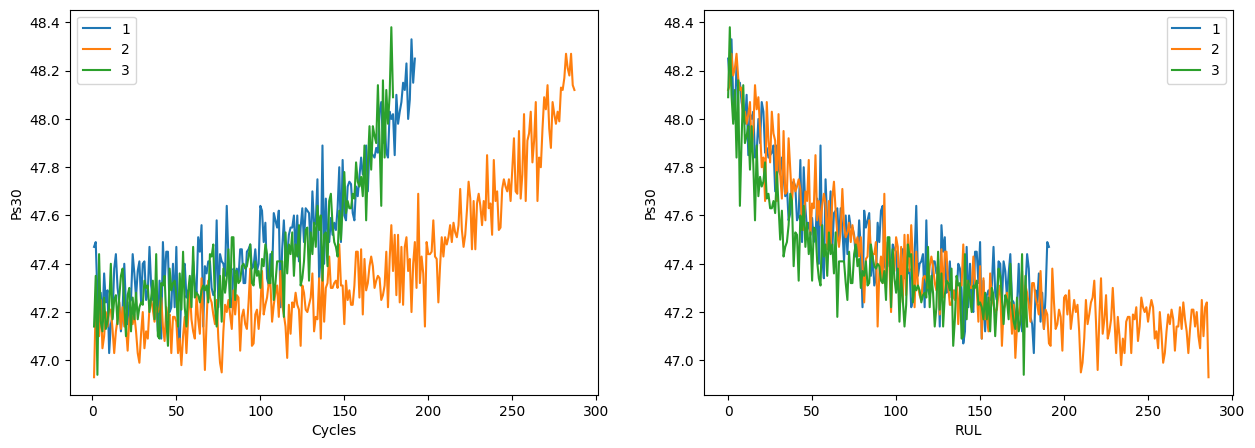

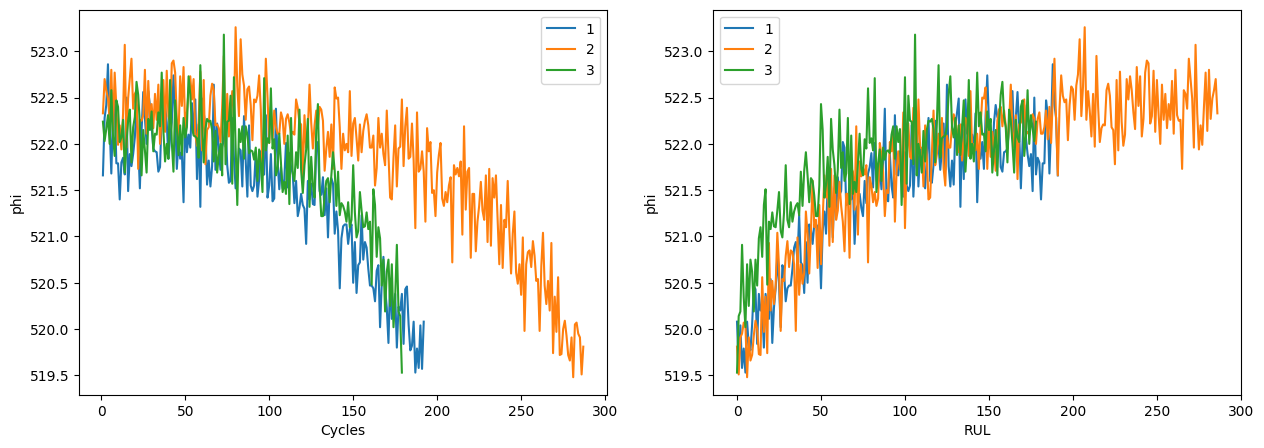

In [13]:
# plot the course of the sensors Ps30 and phi for the first three engines
n_engines = 3

plt.figure(figsize=(15,5))
sbp = plt.subplot(1,2,1)
for jj in range (1,1+n_engines):
    df_rul_jj = df_rul[df_rul['Engine'] == jj]
    plt.plot(df_rul_jj['Cycle'], df_rul_jj['Ps30'])
    plt.legend(range(1,1+n_engines))
    plt.xlabel('Cycles')
    plt.ylabel('Ps30')

sbp = plt.subplot(1,2,2)
for jj in range (1,1+n_engines):
    df_rul_jj = df_rul[df_rul['Engine'] == jj]
    plt.plot(df_rul_jj['RUL'], df_rul_jj['Ps30'])
    plt.legend(range(1,1+n_engines))
    plt.xlabel('RUL')
    plt.ylabel('Ps30')

plt.figure(figsize=(15,5))

sbp = plt.subplot(1,2,1)
for jj in range (1,1+n_engines):
    df_rul_jj = df_rul[df_rul['Engine'] == jj]
    plt.plot(df_rul_jj['Cycle'], df_rul_jj['phi'])
    plt.legend(range(1,1+n_engines))
    plt.xlabel('Cycles')
    plt.ylabel('phi')

sbp = plt.subplot(1,2,2)
for jj in range (1,1+n_engines):
    df_rul_jj = df_rul[df_rul['Engine'] == jj]
    plt.plot(df_rul_jj['RUL'], df_rul_jj['phi'])
    plt.legend(range(1,1+n_engines))
    plt.xlabel('RUL')
    plt.ylabel('phi')






Text(0, 0.5, 'RUL')

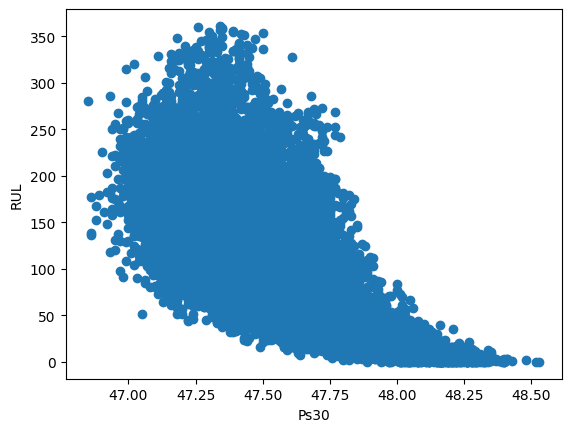

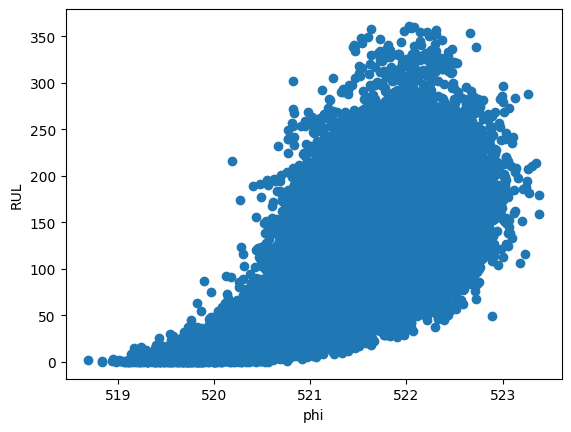

In [14]:
# scatter plots to visualize the correlation between the sensors and the RUL

plt.figure()
plt.scatter(df_rul['Ps30'], df_rul['RUL'])
plt.xlabel('Ps30')
plt.ylabel('RUL')


plt.figure()
plt.scatter(df_rul['phi'], df_rul['RUL'])
plt.xlabel('phi')
plt.ylabel('RUL')


The correlation between the sensor data and the RUL seems to be greater when RUL reaches zero. For healthy engines, the values stay nearly constant with some random fluctuations, but do not seem to depend on the RUL.
Consequently, the prediction of RUL will probably be more successful towards the end of life of the engines, when there are first signs of degradation.

In [15]:
# correlation for the first 100 cycles for sensor Ps30
df_rul_start = df_rul[df_rul['Cycle'] <= 100]

df_rul_start_RUL = df_rul_start['RUL']
df_rul_start_Ps30 = df_rul_start['Ps30']
corr_start = df_rul_start_RUL.corr(df_rul_start_Ps30)

print('Correlation for the first 100 cycles: %f' %corr_start)

# correlation for the last 100 cycles for sensor Ps30
df_rul_end = df_rul[df_rul['RUL'] <= 100]

df_rul_end_RUL = df_rul_end['RUL']
df_rul_end_Ps30 = df_rul_end['Ps30']
corr_end = df_rul_end_RUL.corr(df_rul_end_Ps30)

print('Correlation for the last 100 cycles: %f' %corr_end)


Correlation for the first 100 cycles: -0.314036
Correlation for the last 100 cycles: -0.772488
